In [29]:
import pandas as pd
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [31]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
X.shape

(150, 4)

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
df = X.join(pd.Series(y, name='class'))

In [35]:
class_feature_means = pd.DataFrame(columns=iris.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means


,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


In [36]:
import numpy as np
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((4,4))
    for index, row in rows.iterrows():
            x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
        
            s += (x - mc).dot((x - mc).T)
    
    within_class_scatter_matrix += s

within_class_scatter_matrix

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [37]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

between_class_scatter_matrix

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [38]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])


32.19192919827802
0.2853910426230735
3.2518192123006476e-15
3.2518192123006476e-15


In [39]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))


Explained Variance
Eigenvector 0: 0.9912126049653671
Eigenvector 1: 0.008787395034632797
Eigenvector 2: 1.0012584745847937e-16
Eigenvector 3: 1.0012584745847937e-16


In [40]:
w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real


In [41]:
X_lda = np.array(X.dot(w_matrix))


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['class'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

No handles with labels found to put in legend.


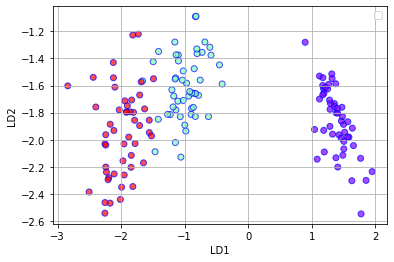

In [43]:
from matplotlib import pyplot as plt

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend()
plt.grid(True)
plt.show()

# Using library

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)


In [45]:
lda.explained_variance_ratio_


array([0.9912126, 0.0087874])

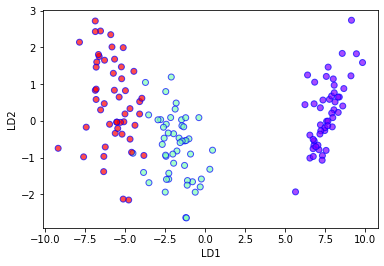

In [46]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X_lda,y,random_state=42)
model=GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [48]:
from sklearn.model_selection import cross_val_score
val = cross_val_score(model,X_train,y_train,cv=4)
print(val)
val.mean()

[0.96428571 0.96428571 0.96428571 1.        ]


0.9732142857142857

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

In [51]:
from sklearn.model_selection import cross_val_score
val = cross_val_score(knn,X_train,y_train,cv=4)
print(val)
val.mean()

[0.96428571 0.92857143 0.92857143 1.        ]


0.9553571428571428

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)